In [1]:
import numpy as np
import cv2
import h5py
from scipy import stats

%matplotlib inline
from matplotlib import pyplot as plt

In [24]:
#im = cv2.imread('../data/sports.jpg')
#im = cv2.imread('../data/lightson.jpg', flags=cv2.IMREAD_COLOR)
#im = cv2.imread('../data/allon.jpg', flags=cv2.IMREAD_COLOR)
#im = cv2.imread('../data/allon_lightson.jpg')

# zones 1 and 3 on
#im = cv2.imread('../data/dump/hvac/statechange/2019-02-22_12-28-59.jpg.jpg')

#im = cv2.imread('../data/dump/hvac/failures/2019-02-22_18-58-54.jpg.jpg')
with h5py.File('../data/hvacmon_data.h5', 'r') as f:
    im = f['/annotated/2019-02-23T04-18-28'][:]

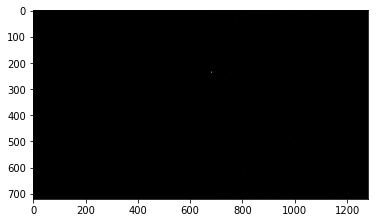

In [25]:
plt.imshow(im)

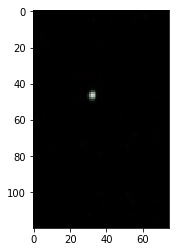

In [26]:
#
# Crop an ROI -- hardcode for now!
#
im_roi = im[190:310,650:725]
plt.imshow(im_roi)

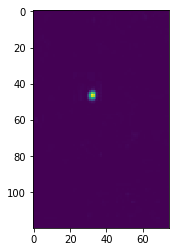

In [27]:
im_hsv = cv2.cvtColor(im_roi, cv2.COLOR_BGR2HSV)
plt.imshow(im_hsv[:,:,2])

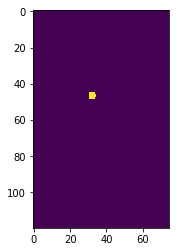

In [28]:
mask = (im_hsv[:,:,2] > 75).astype(np.uint8)*255
plt.imshow(mask)

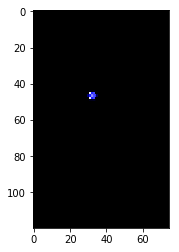

In [29]:
params = cv2.SimpleBlobDetector_Params()
params.minThreshold = 0
params.maxThreshold = 400
params.minDistBetweenBlobs = 1
params.filterByArea = True
params.minArea = 0
params.maxArea = 25
params.filterByCircularity = False
params.filterByConvexity = False
params.filterByInertia = False
params.filterByColor = False

detector = cv2.SimpleBlobDetector_create(params)
keypoints = detector.detect((mask.astype(np.uint8)))

im_with_keypoints = cv2.drawKeypoints(mask, keypoints, np.array([]), (0,0,255), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.imshow(im_with_keypoints)
#plt.imshow(total_mask)

In [30]:
pts = np.asarray([[p.pt[1], p.pt[0]] for p in keypoints])

In [31]:
green_led_row_idx = np.argmin(pts[:,0])

power_led = pts[green_led_row_idx, :]
power_led

array([46.5       , 32.35416794])

9

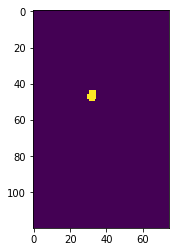

In [33]:
# Sanity check - is the 'power led' actually green?
lower_green = np.array([20,0,20])
upper_green = np.array([110,255,255])
mask_green = cv2.inRange(im_hsv, lower_green, upper_green)
plt.imshow(mask_green)

mask_green
patch = mask_green[int(power_led[0])-1:int(power_led[0])+2,int(power_led[1])-1:int(power_led[1])+2]
len((patch > 0).flatten())

len((patch[patch > 0]).flatten())

In [ ]:
status_leds = np.delete(pts, green_led_row_idx, axis=0)
status_leds

In [ ]:
led_spacing = (7,7)

# Row offsets
zone_rows_estimated = \
    np.linspace(
        green_led_position[0] + led_spacing[0],
        green_led_position[0] + led_spacing[0]*4,
        4)

zone_cols_estimated = \
    np.linspace(
        green_led_position[1],
        green_led_position[1] + led_spacing[1],
        2)
zone_rows_estimated

In [ ]:
status = np.zeros((4,2), dtype=np.uint8)

for led in status_leds:
    zone_row = (np.abs(led[0]-zone_rows_estimated)).argmin()
    zone_col = (np.abs(led[1]-zone_cols_estimated)).argmin()
    status[zone_row, zone_col] = 1
    
print(status)
    
    
    
    


In [ ]:
im_roi.shape[0]

In [ ]:
(np.abs(status_leds[0,0]-zone_rows_estimated))